# Day 3: Numpy 

Numpy (numerical python) is the fundamental package for scientific computing with Python. It contains among other things:

- a powerful n-dimensional array object (short: `ndarray`)
- sophisticated (broadcasting) functions
- tools for integrating C/C++ and Fortran code
- useful linear algebra, Fourier transform, and random number capabilities

Originally Python was not created for calculations. Therefore numpy was introduced. Without numpy, calculating machine learning algorithms in Python wouldn't be possible. 

Followings are the main reasons behind the fast speed of Numpy.

- Numpy `ndarray` is a collection of similar data-types which are densely packed in memory. A Python `list` can have different data-types, which puts lots of extra constraints while doing computation on it.
- Numpy is able to divide a task into multiple subtasks and process them parallelly (multi-threading).
- Numpy functions are implemented in C. Which again makes it faster compared for example. to Python `list`.

We will see an example of Python vs. Numpy in the exercises.

Documentation for Numpy is available at: https://docs.scipy.org/doc/numpy/reference/

In [1]:
## Python Numpy doc

In [2]:
import numpy as np # standard way to import numpy 

## Array Basics

First, we want to learn how to create an `ndarray`. We can initialize numpy arrays from a list using the `np.array()` function.

In [3]:
X = np.array([1, 5, 8 ,4])
Y = np.array([2, 3, 4, 5])
X, Y, type(X)

(array([1, 5, 8, 4]), array([2, 3, 4, 5]), numpy.ndarray)

### Operations

Compared to python `list`, standard operations between `ndarray` are very different, and based on mathematical purpose. Here are some examples.

In [4]:
A = X + Y           # element-wise addition
M = X * Y           # element-wise multiplication 
D = np.dot(X, Y)    # dot product
T = X.T             # transposing
X_tail = X[2:]      # indexing (similar to lists)

A, M, D, T, X_tail

(array([ 3,  8, 12,  9]),
 array([ 2, 15, 32, 20]),
 69,
 array([1, 5, 8, 4]),
 array([8, 4]))

When we do the same operation with normal python `list`, we see that the results are different.

In [5]:
X_list = [1, 5, 8 ,4]
Y_list = [2, 3, 4, 5]

In [6]:
print(X_list + Y_list) # concat
print(X_list * Y_list) # -> raises Exception

[1, 5, 8, 4, 2, 3, 4, 5]


TypeError: can't multiply sequence by non-int of type 'list'

We see, that list cannot be multiplied easily. To get the equivalent behavior with `list`, we can use list comprehension.

In [8]:
A_list = [x + y for x, y in zip(X_list, Y_list)] # element-wise addition
M_list = [x * y for x, y in zip(X_list, Y_list)] # element-wise multiplication
D_list = sum([x * y for x, y in zip(X_list, Y_list)]) # dot product

A_list, M_list, D_list

([3, 8, 12, 9], [2, 15, 32, 20], 69)

The numpy way is a lot easier to read and more compact than the pure python way. Additionaly, adding more dimensions (for more features of our data points!) is easily done in numpy.

## Array Properties

The command `shape` on a numpy array outputs a tuple containing the size of each dimensions. `ndim` tells us the number of dimensions directly. These commands are important to use, since many numpy functions need equal/similar shapes for input arrays to be used. 

In [9]:
A = np.array([1,2,3,4]) 

X = np.array([[1,2,3,4],
              [5,6,7,8]])

A.shape, A.ndim, X.shape, X.ndim 

((4,), 1, (2, 4), 2)

### Array dtypes

Each array only has one value type, unlike normal python `list`. We can check to type with `dtype`.

In [10]:
A = np.ones((2, 2))
type(A), A.shape, A.size, A.ndim, A.dtype

(numpy.ndarray, (2, 2), 4, 2, dtype('float64'))

In [11]:
B = np.ones((3,3,3))
type(B), B.shape, B.size, B.ndim, B.dtype

(numpy.ndarray, (3, 3, 3), 27, 3, dtype('float64'))

![](img/numpy_array_properties.png)

### Array Casting 

Similar to primitive types, we can cast numpy arrays to certain types. The function `astype` returns a copy of the array with the defined `dtype`. If we do operations on two or more arrays with different data type, the highest precision is used for the returned array. 

In [12]:
E = A.astype('float32')
A.dtype, E.dtype, (A + E).dtype # higher precision is used!

(dtype('float64'), dtype('float32'), dtype('float64'))

## Matrices

Before, we only used arrays with one dimension. We can easily also build numpy arrays with more than one dimension, which can be used as matrices. To build arrays with more dimenionmatrices, we can nest lists (lists in list).

In [13]:
A = np.array([[1, 2, 3],
              [4, 5, 6]])

A, A.shape, A.ndim

(array([[1, 2, 3],
        [4, 5, 6]]),
 (2, 3),
 2)

In [14]:
B = np.array([[1, 3, 5],
              [2, 4, 6]])

We can use the same operations as before. But for various the functions, e.g. `np.dot()`, we need to make sure that the shapes of the matrices are aligned/match. 

In [15]:
# Elementwise multiplication
A * B

array([[ 1,  6, 15],
       [ 8, 20, 36]])

In [16]:
# Matrix-matrix multiplication
np.dot(A, B.T)

array([[22, 28],
       [49, 64]])

In [17]:
A @ B.T # short version of array multiplication

array([[22, 28],
       [49, 64]])

In [18]:
np.dot(A, A) # -> raises Error, because shapes don't align

ValueError: shapes (2,3) and (2,3) not aligned: 3 (dim 1) != 2 (dim 0)

![](img/numpy_functions.png)

In [21]:
np.dot(A, A.T) # -This will work

array([[14, 32],
       [32, 77]])

## Special Array Initializations

Instead of typing each single value for an array by hand, numpy offers a couple fast ways to initialize arrays. Here are some examples.

In [22]:
A = np.zeros((3, 4))         # array of given shape, filled with zeros
B = np.ones((2, 6))          # same, but filled with ones
C = np.diag((1.0, 2.0, 3.0)) # diagonal matrix, with given entries on main diagonal 
D = np.eye(3)                # identity matrix with given size
E = np.random.rand(3, 3)     # random array of given shape
F = np.triu(B)               # upper triagonal matrix

print(A)
print(B)
print(C)
print(D)
print(E)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]]
[[1. 0. 0.]
 [0. 2. 0.]
 [0. 0. 3.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[0.49737445 0.92498766 0.13557852]
 [0.64174152 0.10461129 0.98809034]
 [0.14360981 0.26416079 0.57952714]]


There are a lot more, which will help you to create standard arrays quickly. Can you find more under: https://docs.scipy.org/doc/numpy/reference/?

## Array Rearanging

Sometimes we need to reorganize an array to a different shape to do certain operations. Thereby we dont change the content of the array, but only change the order, switch dimensions etc. Here are some example functions for Numpy documentation.

In [23]:
A = np.array([[1, 2, 3], [4, 5, 6]])

In [24]:
A, A.size

(array([[1, 2, 3],
        [4, 5, 6]]),
 6)

`reshape` lets us reshape the array into a specified new form. We have to make sure, that the specified form can be achieved with the current form. In other words, the `size` has to be the same after reshaping.

In [25]:
C = A.reshape((3,2)) # reshape into a 3x2 matrix
C, C.size # size is the same

(array([[1, 2],
        [3, 4],
        [5, 6]]),
 6)

In [26]:
A.reshape((1,6)) # reshape into a 1x6 matrix (this array still has 2 dimensions!)

array([[1, 2, 3, 4, 5, 6]])

In [27]:
A.reshape(6) # reshape into a 6 array (this array only has 1 dimensions!)

array([1, 2, 3, 4, 5, 6])

In [28]:
A.reshape((2,6)) # will throw error, because we cannot rearange 2x3 into 2x6 (size must be same)

ValueError: cannot reshape array of size 6 into shape (2,6)

Another quick way to flatten array is to use `ravel`.

In [29]:
A.ravel() # same as A.reshape(6), but better since we do not need to know the size of the array

array([1, 2, 3, 4, 5, 6])

In [30]:
B = np.array([[1, 2, 3],
             [4, 5, 6],
             [7, 8, 9]])

In [31]:
B.ravel() # ravel appends rows  

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

`transpose` gives us the transpose of the array (switch rows and columms)

In [32]:
C = B.transpose()
C

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

In [33]:
C.ravel()

array([1, 4, 7, 2, 5, 8, 3, 6, 9])

There are a lot other functions of course for reorganization! Again, in the documentation there are a lot more!

## Axes 

Each dimension of a `ndarray` also has an index, which are called axis. Like any index in programming, the first dimension has the axis 0. Many functions in numpy allow to specify an axis or multiple axes, along which the function should be applied. To be sure, read the documentation of a function to see what effect specifying the axis/axes has.

In [34]:
A = np.arange(27).reshape(3,3,3) # create a 3x3x3 array (a cube or tensor)
A

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8]],

       [[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]],

       [[18, 19, 20],
        [21, 22, 23],
        [24, 25, 26]]])

In [35]:
np.transpose(A)

array([[[ 0,  9, 18],
        [ 3, 12, 21],
        [ 6, 15, 24]],

       [[ 1, 10, 19],
        [ 4, 13, 22],
        [ 7, 16, 25]],

       [[ 2, 11, 20],
        [ 5, 14, 23],
        [ 8, 17, 26]]])

In [36]:
np.transpose(A,axes=(2,0,1)) # change the order we want to transpose the array, by specifying the order of axes

array([[[ 0,  3,  6],
        [ 9, 12, 15],
        [18, 21, 24]],

       [[ 1,  4,  7],
        [10, 13, 16],
        [19, 22, 25]],

       [[ 2,  5,  8],
        [11, 14, 17],
        [20, 23, 26]]])

In [37]:
B = np.arange(4).reshape(2,2)
C = np.arange(5,9).reshape(2,2)
B, C

(array([[0, 1],
        [2, 3]]),
 array([[5, 6],
        [7, 8]]))

Depending on the axis we specify, the matrices are concatenated along a different axis.

In [38]:
np.concatenate((B, C), axis=0), np.concatenate((B, C), axis=0).shape # concatenate along axis=0

(array([[0, 1],
        [2, 3],
        [5, 6],
        [7, 8]]),
 (4, 2))

In [39]:
np.concatenate((B, C), axis=1), np.concatenate((B, C), axis=1).shape # concatenate along axis=1

(array([[0, 1, 5, 6],
        [2, 3, 7, 8]]),
 (2, 4))

## Broadcasting

Many numpy functions require the shapes of the input array to match, as we have seen. But numpy is able to handle/adjust the shape of an array in many cases.  This is called __broadcasting__. When two arrays have different shapes, the array with smaller dimension is "broadcasted" across the larger array to have compatible shapes.

In [40]:
# example: we want to scale the array a by 2
a = np.array([1.0, 2.0, 3.0]) 
scale = np.array([2.0, 2.0, 2.0])
a * scale

array([2., 4., 6.])

In [41]:
# way faster, is to use broadcasting (simple)
a = np.array([1.0, 2.0, 3.0]) 
scale = 2
a * scale # strictly mathematical, this is not correct!

array([2., 4., 6.])

In [42]:
# we can also do this with all other operations
a + 2, a - 2, a/2

(array([3., 4., 5.]), array([-1.,  0.,  1.]), array([0.5, 1. , 1.5]))

We see, we get the same result, even though our `scale` is not the same shape as the array `A` (technically `scale` does not even have a shape!). We can also broadcast arrays with different shapes. The general rule is:

When operating on two arrays, NumPy compares their shapes element-wise. It starts with the trailing dimensions, and works its way forward. Two dimensions are compatible when:

- they are equal, or

- one of them is 1

More info is available under:(https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html)

Here are some examples using broadcasting: 

In [43]:
a = np.arange(4)
aa = a.reshape(4,1)
b = np.ones(5)
c = np.ones((3,4))

In [44]:
a + b # will throw an error

ValueError: operands could not be broadcast together with shapes (4,) (5,) 

In [45]:
a.shape, b.shape # no wonder, the shapes are not compatible

((4,), (5,))

In [46]:
(aa + b).shape

(4, 5)

In [47]:
aa + b # the last dimen. of xx gets multiplied 5 times, the size of the dimen of y

array([[1., 1., 1., 1., 1.],
       [2., 2., 2., 2., 2.],
       [3., 3., 3., 3., 3.],
       [4., 4., 4., 4., 4.]])

In [48]:
a, a.shape

(array([0, 1, 2, 3]), (4,))

In [49]:
c, c.shape

(array([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]),
 (3, 4))

In [50]:
(a + c).shape

(3, 4)

The size of the last dimensions of both arrays are 4 and are compatible. `a` has only one dimension, but broadcasting will internally add a new dimension of size 1. Therefore, the arrays are compatible. 


In [53]:
a + c 

array([[1., 2., 3., 4.],
       [1., 2., 3., 4.],
       [1., 2., 3., 4.]])

In [55]:
aaa = np.arange(3)
aaa + c # this will throw a error , because last dimensions sizes dont fit (3 and 4)

ValueError: operands could not be broadcast together with shapes (3,) (3,4) 

This picture illustrates the concept of broadcasting.

![](img/numpy_broadcasting.png)

## Indexing

Just like python `list`, we can use the standard indexing techniques to cut and slice parts from a numpy array. We can use known indexing techniques for every dimension of the numpy array, and seperate them with a comma.

In [56]:
A = np.arange(30).reshape(6, 5)
print(A)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]
 [25 26 27 28 29]]


The colon `:` indicates that we take all values in that dimension.

In [57]:
A[3, :] # select 3rd row, every column (so the entire 3rd row)

array([15, 16, 17, 18, 19])

In [58]:
print(A[:, 3]) # select 3rd row, every column (so the entire 3rd row)

[ 3  8 13 18 23 28]


In [59]:
print(A[3]) # this works too, if only the first dimension is specfied, 
            # the rest is just assumed to be filled with :

[15 16 17 18 19]


In [60]:
print(A[,3]) # this doesnt work, since numpy needs to know what you want before

SyntaxError: invalid syntax (<ipython-input-60-6eb5c9b056d9>, line 1)

In [65]:
print(A[:,3]) # this does work again, ":" indicates everything

[ 3  8 13 18 23 28]


We can also select windows by setting start and end position of the slicing.

In [66]:
print(A[1:5, 1:4]) # get 1 until 5th row, and only 1st to 4th column

[[ 6  7  8]
 [11 12 13]
 [16 17 18]
 [21 22 23]]


We can also indicate steps when slicing.

In [67]:
print(A[::2, 1::2]) # every second row and every second column starting from index 1

[[ 1  3]
 [11 13]
 [21 23]]


And we can also use negative indices (basically everything we already know from `list`).

In [68]:
print(A[:, -2:]) # all rows, all columns from second last

[[ 3  4]
 [ 8  9]
 [13 14]
 [18 19]
 [23 24]
 [28 29]]


### Integer Array Slicing

__New__: We can also use an list or a numpy array of indices (so must contain integers, e.g. `dtype = int`) to select certain dimensions.

In [69]:
A[:, [1, 4]] #Select column 1 and 4

array([[ 1,  4],
       [ 6,  9],
       [11, 14],
       [16, 19],
       [21, 24],
       [26, 29]])

When using indices for selection, all list must be compatible. That means, we can broadcast the indices.

In [70]:
# select two values from the array
row_idx = [5, 4]
col_idx = [2,4]
A[row_idx, col_idx]

array([27, 24])

In [71]:
# select three values with broadcasting
row_idx = [1]
col_idx = [2, 3, 4]
A[row_idx, col_idx]

array([7, 8, 9])

In [72]:
# wont work, since indices are not compatible
row_idx = [5, 4, 4]
col_idx = [2,4]
A[row_idx, col_idx]

IndexError: shape mismatch: indexing arrays could not be broadcast together with shapes (3,) (2,) 

In [73]:
# will also throw an error, since out of bounds
idx = [1, 4, 6]
A[idx]

IndexError: index 6 is out of bounds for axis 0 with size 6

Smart indexing is a powerful tool to select elements quickly and with a few lines of code.

In [74]:
diag = np.arange(5)
print(A[diag, diag]) # example to get diagonal entries

[ 0  6 12 18 24]


We can not do this for normal python `list`.

In [75]:
a = [1, 2, 3, 4, 5]

In [76]:
a[[1, 4]] # this does not work with normal python lists

TypeError: list indices must be integers or slices, not list

__Also New:__ Boolean indexing. We can use an array of booleans (`dtype = bool`) for indexing a given array, similar to array indexing. At each position the boolean value `True` will give cut the value, while `False` will not. The boolean array is therefore a filter mask, that will give us out all elements with `True` at a position.

In [77]:
a = np.arange(5)
a

array([0, 1, 2, 3, 4])

In [78]:
bool_array = np.asarray([True, False, False, True, False])
a[bool_array] # only at position 0 and 3 the boolean array is True, 
              # therefore we cut out only these values

array([0, 3])

The boolean mask array can also have more dimension than one.

In [79]:
a = np.random.rand(4, 4)
print(a)
b = a > 0.5 # this is again broadcasting, which we can also apply to comparisons
b

[[0.88606709 0.9887323  0.14197477 0.10640821]
 [0.62040725 0.63833088 0.73156942 0.21030356]
 [0.02032753 0.6852824  0.40182608 0.01322979]
 [0.54221519 0.38173509 0.12598528 0.89828203]]


array([[ True,  True, False, False],
       [ True,  True,  True, False],
       [False,  True, False, False],
       [ True, False, False,  True]])

We see, with boolean operation such as <, we can also create boolean arrays. This is technically broadcasting, since we apply the operation/comparison to each value in the array.

In [80]:
print(b)
c = b.astype(int)
print(c)
print(a[b]) # get all values in a which are bigger than 0.5

[[ True  True False False]
 [ True  True  True False]
 [False  True False False]
 [ True False False  True]]
[[1 1 0 0]
 [1 1 1 0]
 [0 1 0 0]
 [1 0 0 1]]
[0.88606709 0.9887323  0.62040725 0.63833088 0.73156942 0.6852824
 0.54221519 0.89828203]


Boolean indexing is realy quick to see where certain conditions are met in an array, and to extract these values fast. Numpy also has some built-in boolean functions, that we can apply on (boolean) arrays. We can also apply them on other types of array, where the boolean casting is done.

In [81]:
print(np.any(b)) # ask if any value if True (big OR concatination of all value in b)

True


In [82]:
print(np.all(b)) # ask if all values are True (big AND concatination of all values in b)

False


As mentioned, many functions allow to set an axis, in which the function should be applied. The result is then not anymore a single boolean value, but an array of boolean values. 

In [83]:
np.any(b, axis=1), np.all(b, axis=0)

(array([ True,  True,  True,  True]), array([False, False, False, False]))

In [84]:
np.any(a), np.all(a)

(True, True)

In [85]:
a[1,1] = 0 # make value at (1,1) 0
a

array([[0.88606709, 0.9887323 , 0.14197477, 0.10640821],
       [0.62040725, 0.        , 0.73156942, 0.21030356],
       [0.02032753, 0.6852824 , 0.40182608, 0.01322979],
       [0.54221519, 0.38173509, 0.12598528, 0.89828203]])

In [86]:
np.any(a), np.all(a) # casting of float to booleans

(True, False)

The advanced indexing methods for the numpy `ndarray` is very powerful and lets us very quickly select, filter and manipulate values in an array. 

In [87]:
# example. Get all values under border, and set these to zero
border = 0.2
A = np.random.rand(4, 4)
mask = A < border
A_new = np.copy(A)
A_new[mask] = 0
A, A_new

(array([[0.29549498, 0.21668343, 0.54700027, 0.93491282],
        [0.2643502 , 0.99265216, 0.07592196, 0.33323203],
        [0.61511026, 0.39421213, 0.73231103, 0.92031795],
        [0.81770536, 0.9536274 , 0.7005434 , 0.93087444]]),
 array([[0.29549498, 0.21668343, 0.54700027, 0.93491282],
        [0.2643502 , 0.99265216, 0.        , 0.33323203],
        [0.61511026, 0.39421213, 0.73231103, 0.92031795],
        [0.81770536, 0.9536274 , 0.7005434 , 0.93087444]]))

## Numpy Functions

There are a lot of numpy functions to do all kind of stuff with numpy arrays. All basic arithmetic operations are also available in numpy and can be applied to arrays element-wise. There are many powerful ones for linear algebra and others. The chances are high that for anything you want to do with arrays, there is already a function to help you. Here are some examples:

In [88]:
y = np.random.rand(1000) # create an array with 1000 random values

In [89]:
y.max(),y.min(),y.std(),y.mean() # get some easy statistics

(0.9986716922829041,
 0.000309698949171322,
 0.2902080559241724,
 0.4948762484952344)

In [90]:
x = np.array([1,4,5,6,-20])
print(np.argmin(x)) # returns the indices of the minimum value
print(np.argmin(a)) # a is flattened, therefore we get only one value 

4
5


In [91]:
# same with argmax
print(np.argmax(x)) # returns the indices of the minimum value
print(np.argmax(a))

3
1


The `sort()` funtion sorts a list, and the function `argsort()` gives the indices of the sorted list.

In [92]:
x, np.sort(x), np.argsort(x)

(array([  1,   4,   5,   6, -20]),
 array([-20,   1,   4,   5,   6]),
 array([4, 0, 1, 2, 3]))

What `intersect1d()` function will do is, it will return the intersection of 2 arrays — meaning the items that are common in both arrays. Unlike the previous functions, it won't return the index position, it will return the actual values.

In [93]:
arr1 = np.array([3,4,5,6,7])
arr2 = np.array([6,6,7,8,3])
np.intersect1d(arr1, arr2)

array([3, 6, 7])

The `where` function returns the elements of an array depending on a condition, similar to list comprehensions (Mutation for a condition):

In [94]:
a = np.arange(10)
np.where(a > 5, a, a*10) # condition: is value over 5, if yes, keep value. else, multiply with 10

array([ 0, 10, 20, 30, 40, 50,  6,  7,  8,  9])

In [95]:
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
np.where(a > 3, a, a+3) # if value is lower 3, add 3

array([[4, 5, 6],
       [4, 5, 6],
       [7, 8, 9]])

We can also do this on multidimensional arrays:

In [96]:
np.where([[True, False], [True, True]],
         [[1, 2], 
          [3, 4]], # if True pick from here, same position
         
         [[9, 8], 
          [7, 6]]  # if False pick from here, same position
        )

array([[1, 8],
       [3, 4]])

The function `nonzero()` returns the indices of the elements that are non-zero.

In [97]:
x = np.array([[3, 0, 0], [0, 4, 0], [5, 6, 0]])
x

array([[3, 0, 0],
       [0, 4, 0],
       [5, 6, 0]])

In [98]:
np.nonzero(x), type(np.nonzero(x)) # get the all indices of the first dimension and so on

((array([0, 1, 2, 2]), array([0, 1, 0, 1])), tuple)

In [99]:
np.nonzero(x > 5) # get the indices where condition holds

(array([2]), array([1]))

The `nonzero()` function works similar to `where()`, but only returns the indices. But with list indexing we can get the same behavior as with `where()` without manipulation.

In [100]:
mask = np.nonzero(x > 3)
x[mask[0], mask[1]] # all values over 3

array([4, 5, 6])

In [101]:
x[mask] # quicker

array([4, 5, 6])

In [102]:
x[x>3] #same

array([4, 5, 6])

As maybe already noticed, the numpy `ndarray` already implemnets many functions. Therefore many times is is equivalent, to use `np` or the array itself to call a function. 

In [103]:
(x > 3).nonzero(), np.nonzero(x > 3) # this is the same

((array([1, 2, 2]), array([1, 0, 1])), (array([1, 2, 2]), array([1, 0, 1])))

## Basic Plotting

We will start with some basic plotting, for which we are going to use the matplotlib library. Its commonly used and is compatible with numpy and pandas (this will come later).
As with numpy, we need to import matplotlib before we can use it. 

In [104]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
# The command "%matplotlib inline" tells IPython notebook 
# that the plots should be rendered inside the notebook.

First, we need to create a some values. With numpy this goes super fast!!!

In [105]:
x = np.arange(0, 10.001, 0.25)
y1 = np.sin(x)
y2 = np.cos(x)

With `plot`, we will tell the graph to draw a scatter plot with connected lines. The first two inputs are the x- and y-coordinates of the points. The following shows a quick example.

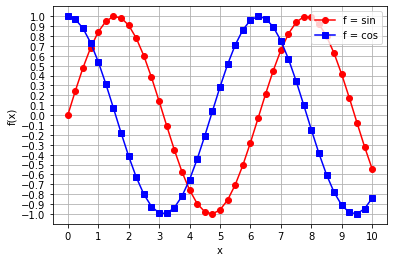

In [106]:
plt.plot(x, y1, 'o-', color='red', label='f = sin')
plt.plot(x, y2, 's-', color='blue', label='f = cos')
xtks = np.arange(0, 10.01, 1)
ytks = np.arange(-1,1.01,0.1)
plt.xticks(xtks)
plt.yticks(ytks)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(loc = 'upper right')
plt.grid(True)

We will cover matplotlib more extensively in the following lecture!